## Graphs for Data Science - Community Detection - NetworkX
#### Integrantes: Álex Álvarez, Alfonso Tobar

In [30]:
import networkx as nx
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

G = nx.read_edgelist('actor-costars.txt', delimiter=',', data=False)

### 1.a) Los 5 Actores más importantes según centralidades:

In [31]:
start = time.time()
dc= nx.degree_centrality(G)
end = time.time()
t_dc = round(end - start, 3)

In [32]:
start = time.time()
cc = nx.closeness_centrality(G)
end = time.time()
t_cc = round(end - start, 3)

In [33]:
start = time.time()
bc = nx.betweenness_centrality(G)
end = time.time()
t_bc = round(end - start, 3)

In [34]:
start = time.time()
ec = nx.eigenvector_centrality(G)
end = time.time()
t_ec = round(end - start, 3)

In [35]:
def show_best(data, time, name, k = 5):
    print(f"Los 5 actores con mayor {name}: (t ={time}s)")
    return pd.Series(data, name = name).sort_values(ascending = False).head(k).to_frame()
    
show_best(dc, t_dc, "Degree Centrality")


Los 5 actores con mayor Degree Centrality: (t =0.001s)


Degree Centrality
Tom Cruise               0.029877
Will Smith               0.022261
Tom Hanks                0.022261
Jack Nicholson           0.022261
Dustin Hoffman           0.019918

In [36]:
show_best(cc, t_cc, "Closeness Centrality")

Los 5 actores con mayor Closeness Centrality: (t =2.697s)


Closeness Centrality
Robert Duvall               0.284168
Dustin Hoffman              0.281823
Robert De Niro              0.278648
Matt Damon                  0.277561
Tom Cruise                  0.277335

In [37]:
show_best(bc, t_bc, "Betweenness Centrality")

Los 5 actores con mayor Betweenness Centrality: (t =7.364s)


Betweenness Centrality
Robert Duvall                 0.094721
Tom Cruise                    0.070474
Jane Fonda                    0.064437
Jack Nicholson                0.058822
Dustin Hoffman                0.056542

In [38]:
show_best(ec, t_ec, "Eigenvector Centrality")

Los 5 actores con mayor Eigenvector Centrality: (t =0.146s)


Eigenvector Centrality
Matt Damon                    0.212341
Tom Cruise                    0.211146
Robert Duvall                 0.205717
Dustin Hoffman                0.172056
Jack Nicholson                0.168933

Centralidades según tiempo utilizado:

* Degree Centrality: (t =0.001s)
* Eigenvector Centrality: (t =0.14s)
* Closeness Centrality: (t =2.784s)
* Betweenness Centrality: (t =7.73s)

> Degree Centrality es considerablemente más rápida de computar a estas escalas, mientras que el Betweenness Centraly es el que más tiempo toma de computar.

### 1.b) Grafos

In [39]:
pos = nx.spring_layout(G, seed=100)

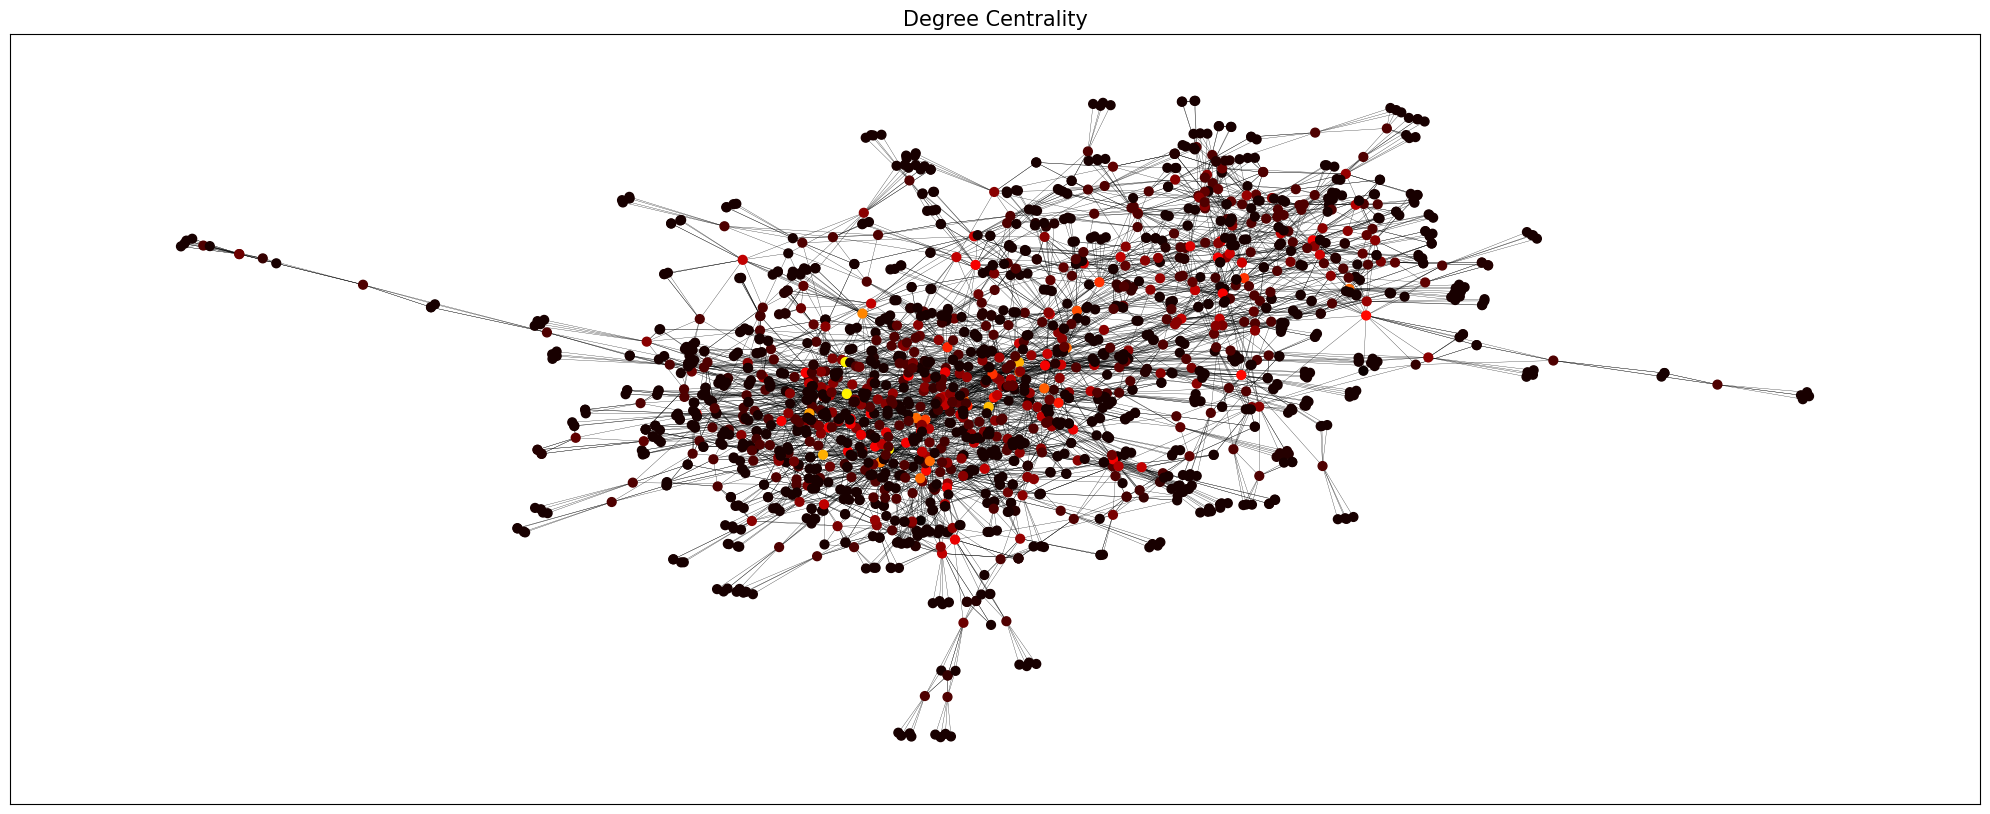

In [57]:
#Grafo degree_centrality
def plot_graph(data, name):
    plt.figure(figsize = (20,8))
    nx.draw_networkx(G, pos = pos, node_size=40, width=0.2, with_labels=False, cmap = "hot", node_color=list(data.values()))
    plt.tight_layout()
    plt.title(f"{name}", fontsize = 15)
    # plt.axis("off")
    plt.show()
    
plot_graph(dc, "Degree Centrality")

> Se puede apreciar que los nodos de mayor centralidad, se encuentran en los sectores de mayor densidad de Nodos, es decir más en el centro del Grafo, pero con bastante dispersión.

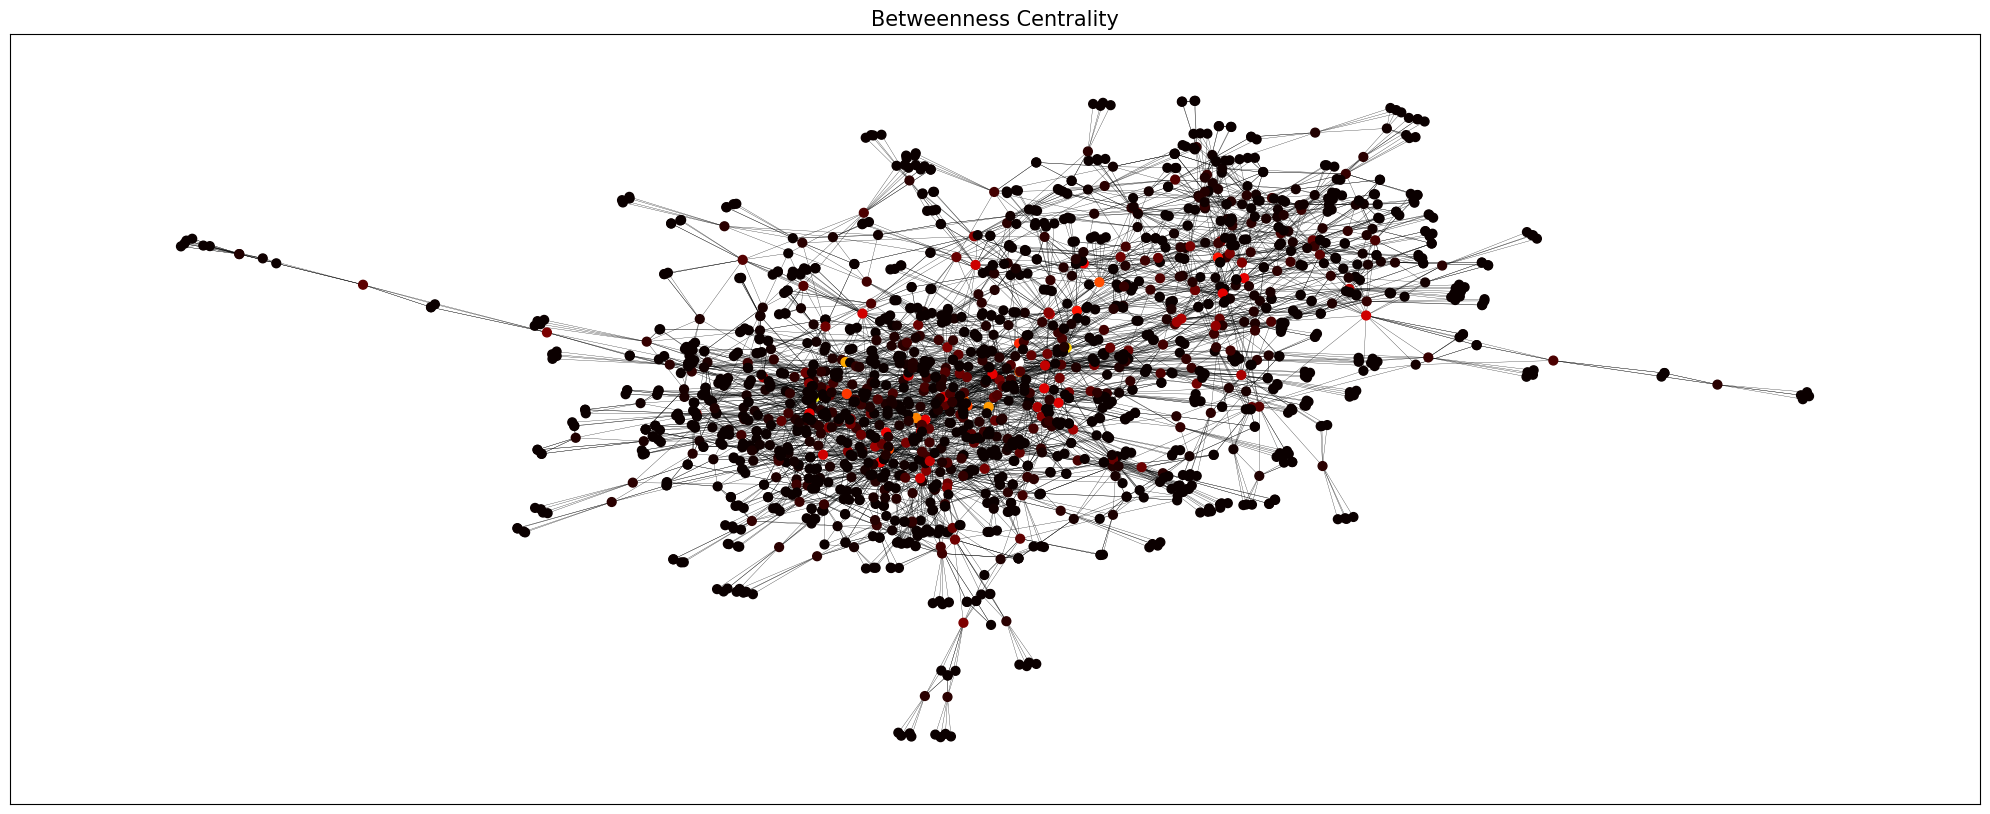

In [58]:
#Grafo betweenness_centrality
plot_graph(bc, "Betweenness Centrality")

> Se puede apreciar que los nodos de mayor centralidad, tienen a estar en el centro, pero son mucho más específicos. Hay una menor cantidad de nodos considerados centrales bajo esta medida. 

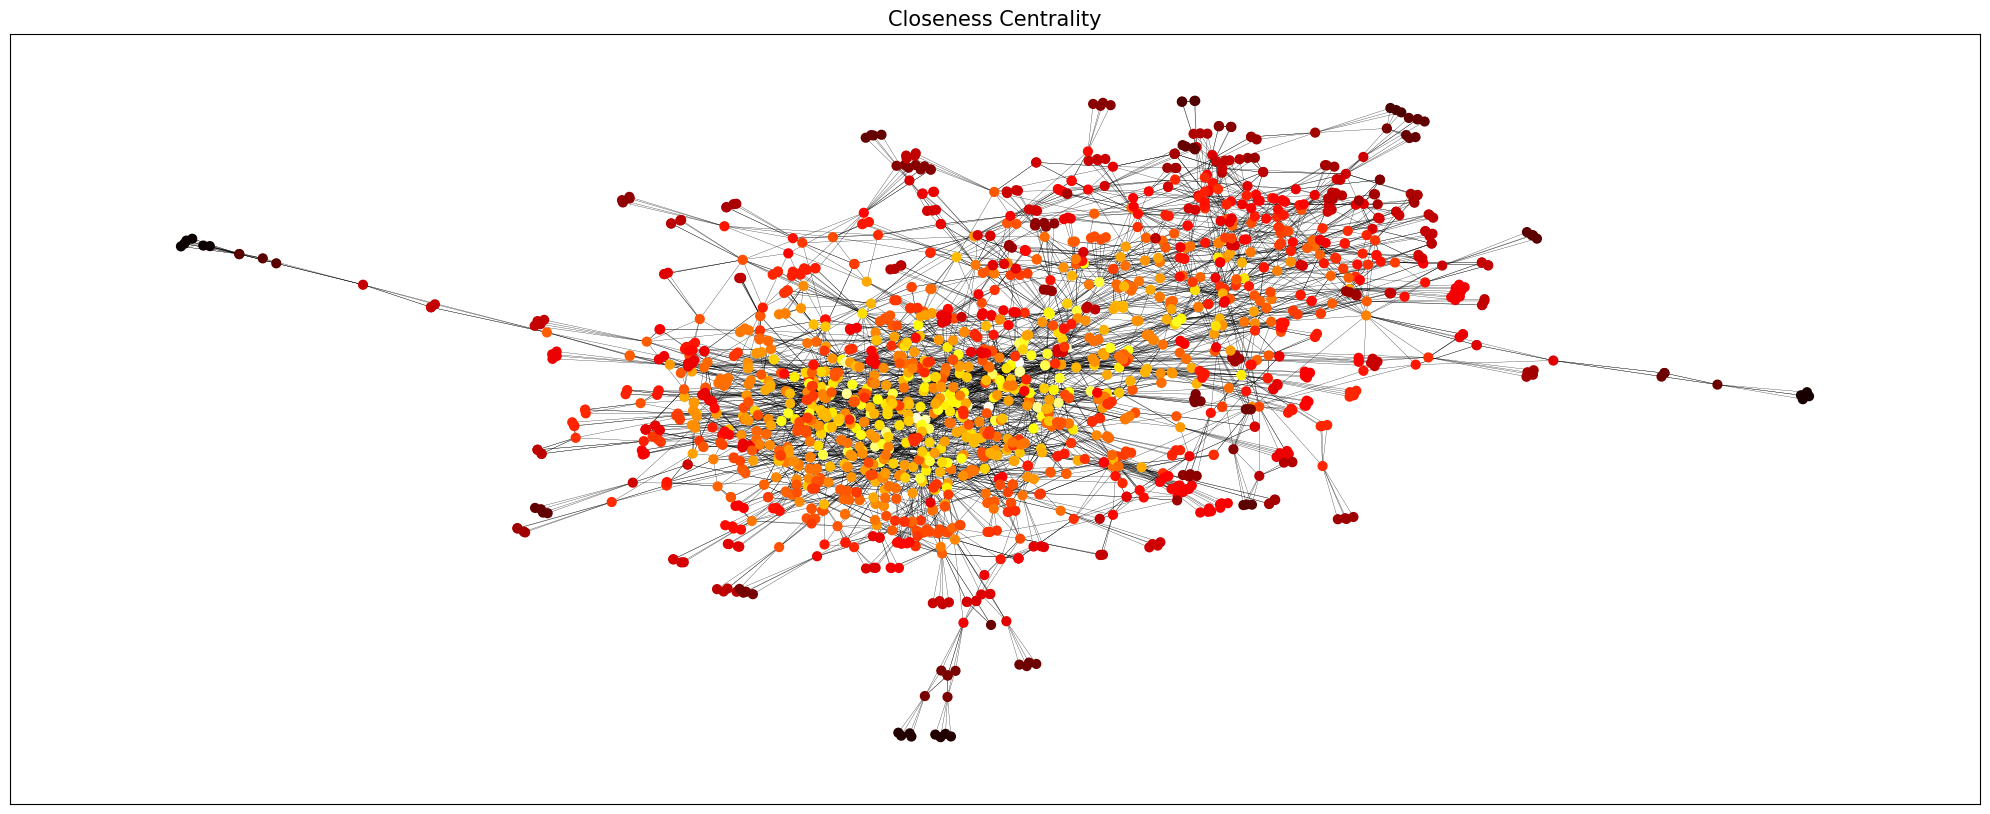

In [59]:
#Grafo closeness_centrality
plot_graph(cc, "Closeness Centrality")

> Se puede apreciar que en los lugares de mayor concentración son practicamente todos centrales. Sólo la medida baja en los extremos del grafo. 

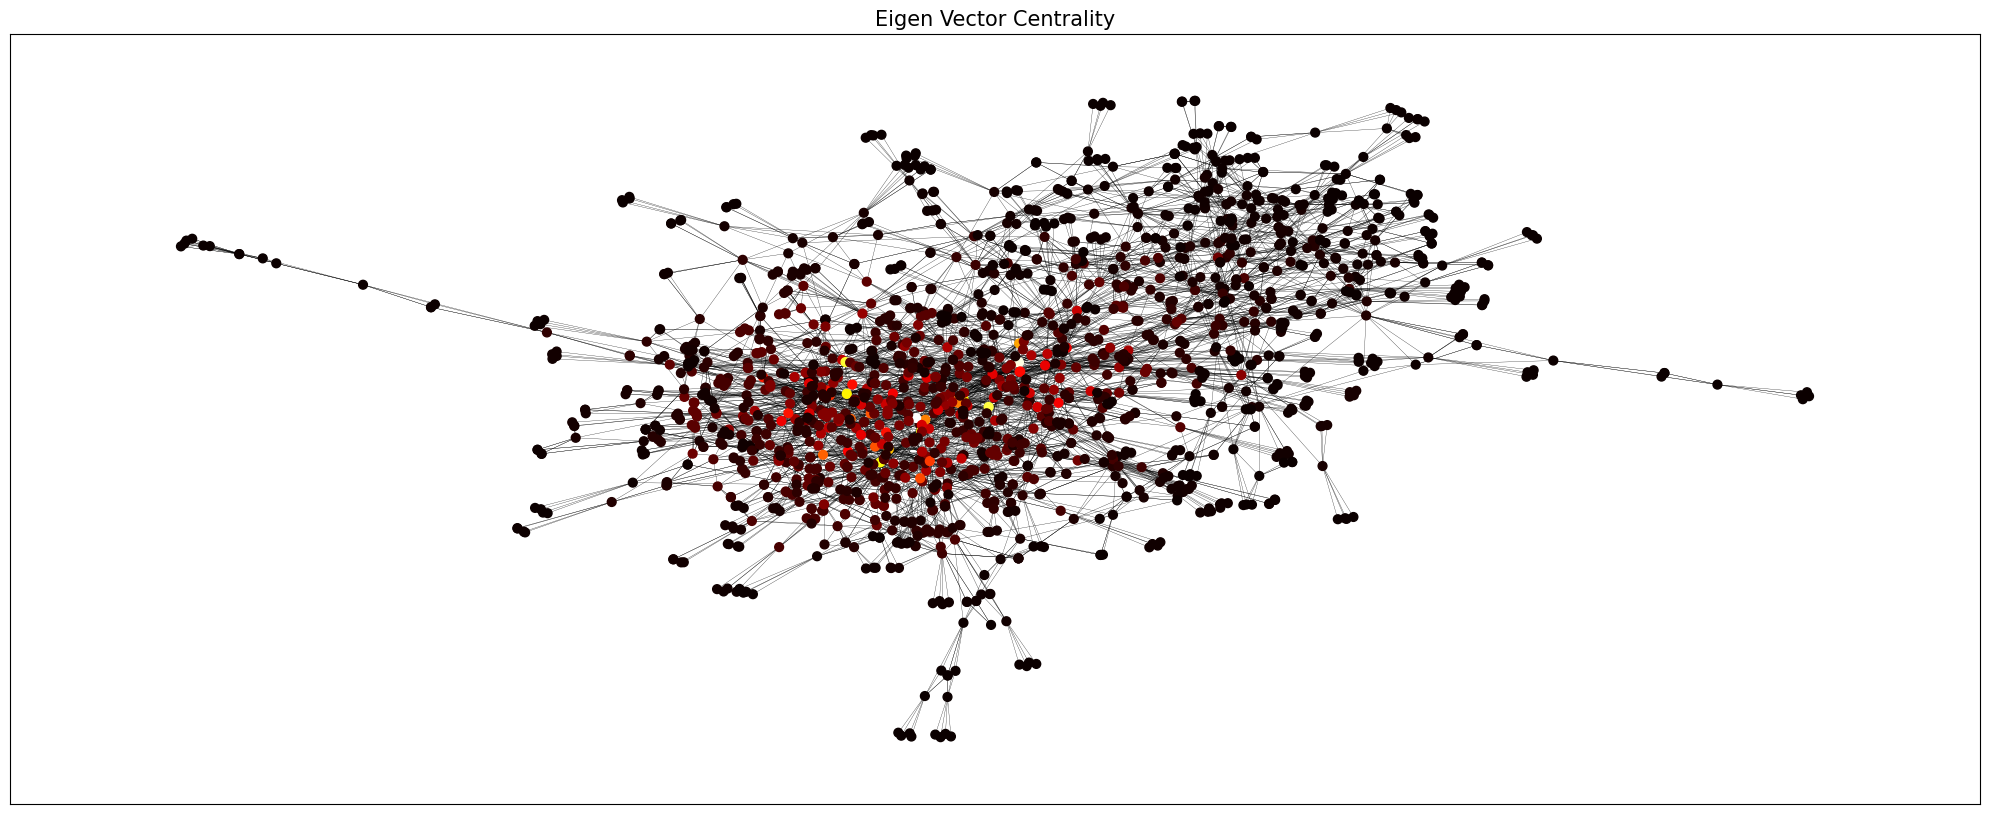

In [60]:
#Grafo eigenvector_centrality
plot_graph(ec, "Eigen Vector Centrality")

> Esta medida considera también nodos centrales pero con mucha menos dispersión que el Degree Centrality.

# 2) Comunidades:

### 2.a) Girvan-Newman y clustering jerárquico con similitud de Jaccard.

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

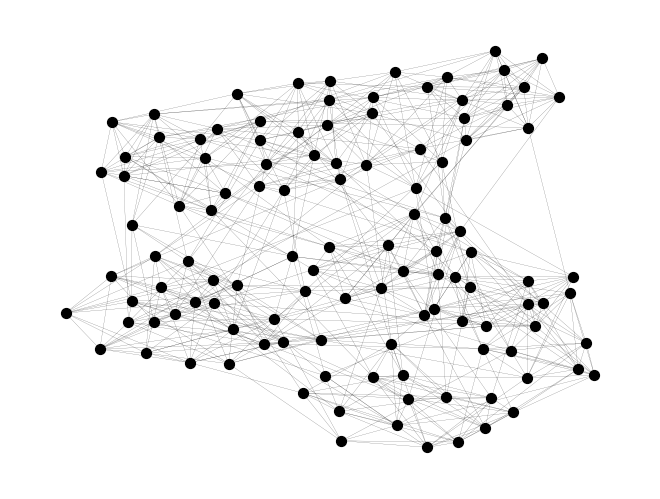

In [15]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
H = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in H.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}
colors = {"green", "red", "blue", "orange", "purple", "pink", "gray",
"cyan", "brown", "black", "navy", "olive"}
pos = nx.spring_layout(H, seed=1969)  # Seed for reproducible layout
nx.draw(H, pos, node_size = 50, width = 0.1, with_labels = False, node_color = 'black')
plt.show()

![](originl-football.png)

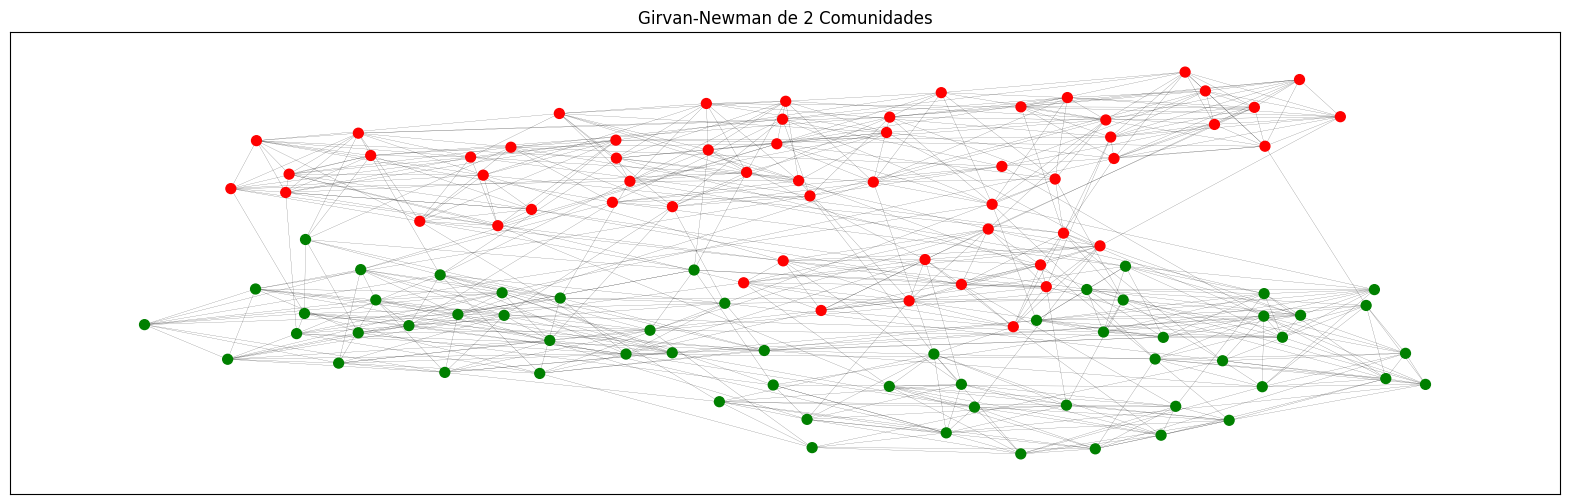

In [16]:
from scipy import cluster
from scipy import spatial

# Comunidades Girvan-Newman para G

c_gn = nx.community.girvan_newman(H)
com_gn = next(c_gn)

# Gráfico comunidades girvan-newman
gn_colors = ["red" if i in com_gn[0] else "green" if i in com_gn[1] else "blue" for i in H.nodes()]
plt.figure(figsize = (20,6))
plt.title("Girvan-Newman de 2 Comunidades")
nx.draw_networkx(H, pos, node_size = 50, width = 0.1, with_labels = False, node_color = gn_colors)

In [17]:
# Comunidades con Jaccard similarity

def hierarchical_clustering_jaccard(H, num_clusters):
    clusters = [[] for _ in range(num_clusters)]
    node_list = list(H.nodes)
    A = nx.to_numpy_matrix(H, nodelist = node_list)
    X = spatial.distance.pdist(A, 'jaccard')
    Z = cluster.hierarchy.linkage(X, method = 'average')
    C = cluster.hierarchy.cut_tree(Z, n_clusters = num_clusters)
    
    for i in range(len(node_list)):
        clusters[C[i][0]].append(node_list[i])

    return clusters


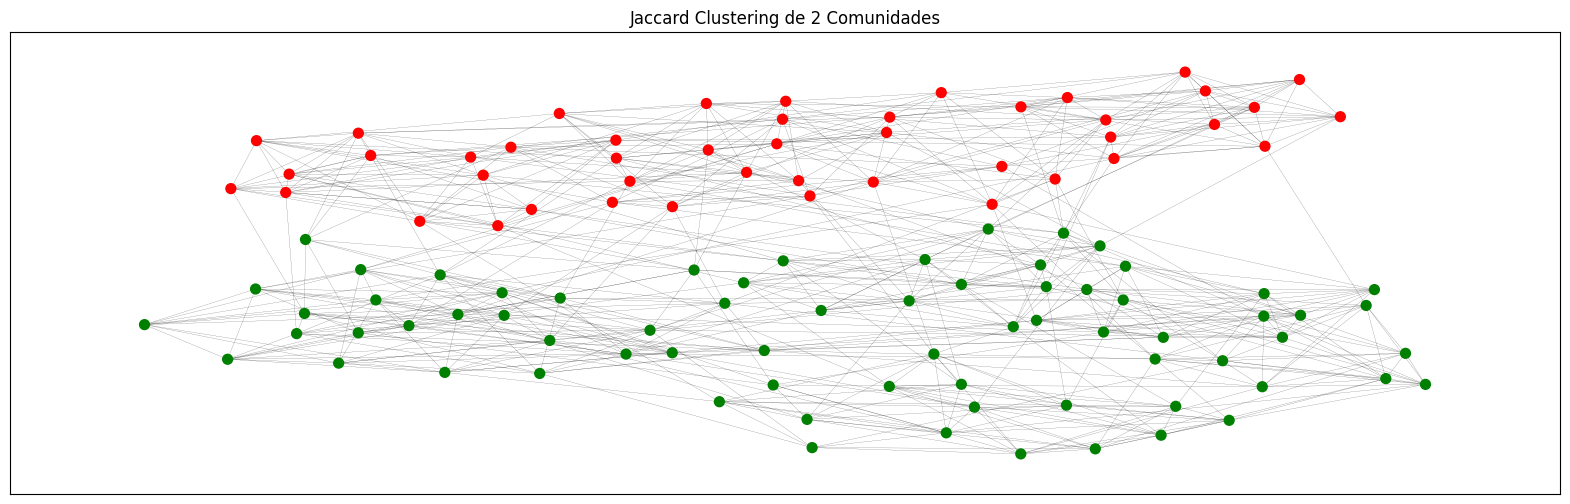

In [18]:
c_jac = hierarchical_clustering_jaccard(H, 2)
jac_colors = ["red" if i in c_jac[0] else "green" if i in c_jac[1] else "blue" for i in H.nodes()]
plt.figure(figsize = (20,6))
nx.draw_networkx(H, pos, node_size = 50, width = 0.1, with_labels = False, node_color = jac_colors)
plt.title("Jaccard Clustering de 2 Comunidades");

> Para dos comunidades se obtienen los mismos resultados con Girvan-Newman y Jaccard.

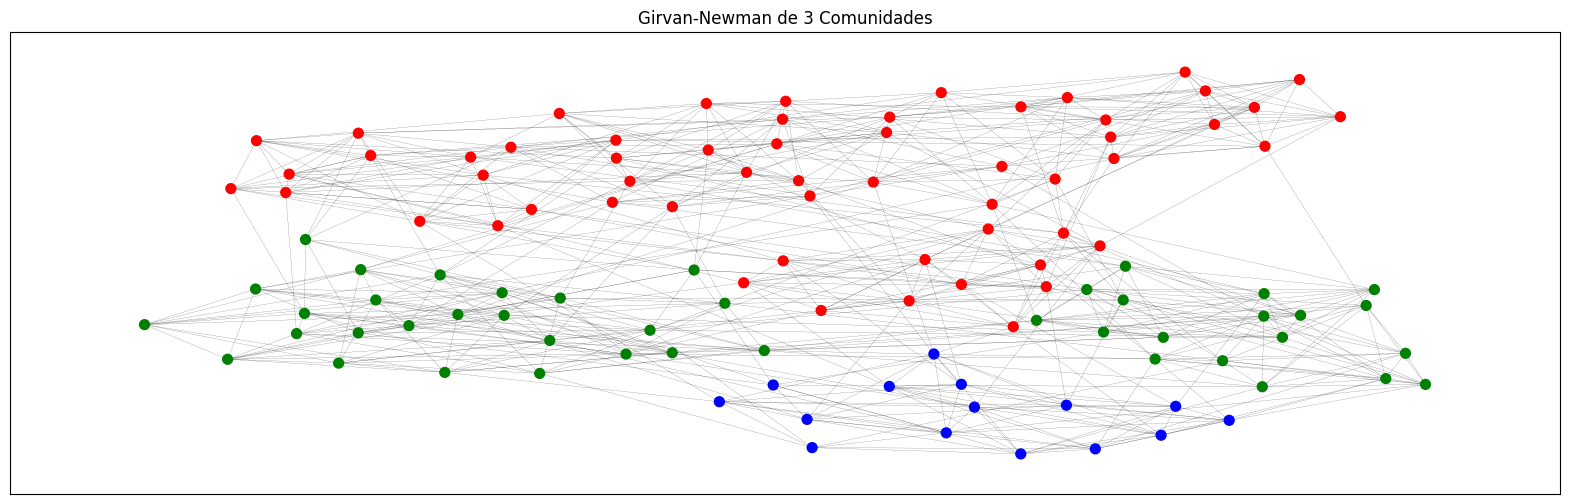

In [19]:
# girvan-newman 3 comunidades
c_gn = nx.community.girvan_newman(H)
com_gn = next(c_gn)
com_gn = next(c_gn)

# Gráfico comunidades girvan-newman
gn_colors = ["red" if i in com_gn[0] else "green" if i in com_gn[1] else "blue" if i in com_gn[2] else "orange" for i in H.nodes()]
plt.figure(figsize = (20,6))
nx.draw_networkx(H, pos, node_size = 50, width = 0.1, with_labels = False, node_color = gn_colors)
plt.title("Girvan-Newman de 3 Comunidades");

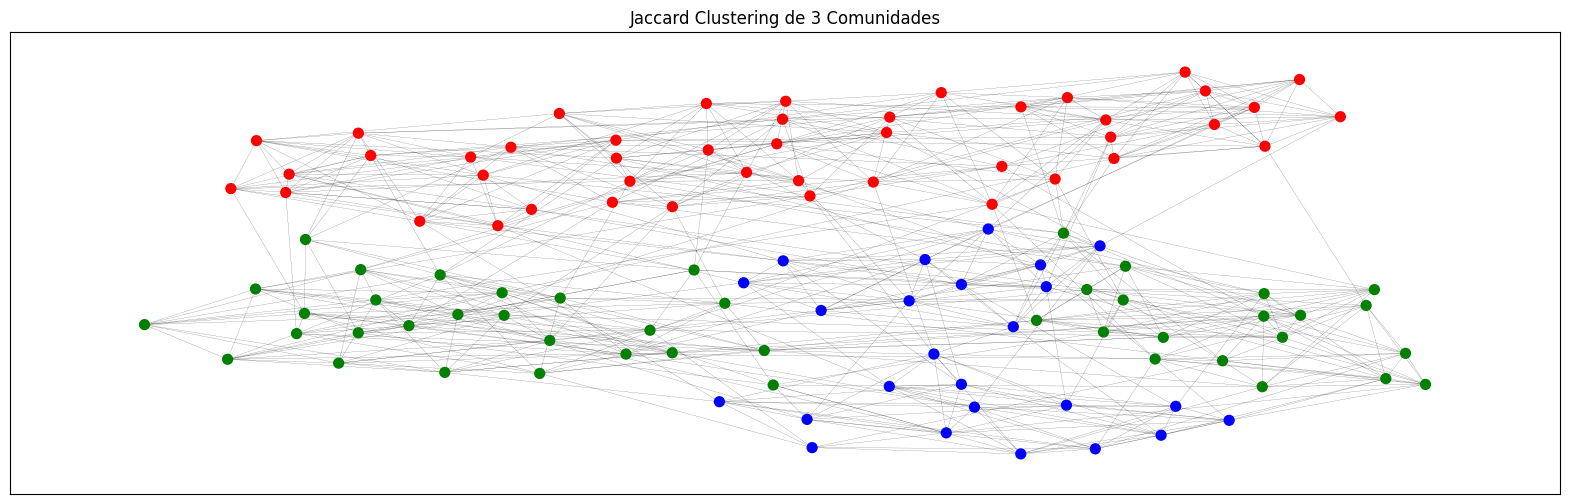

In [20]:
# jaccard 3 comunidades
c_jac = hierarchical_clustering_jaccard(H, 3)
jac_colors = ["red" if i in c_jac[0] else "green" if i in c_jac[1] else "blue" if i in c_jac[2] else "orange" for i in H.nodes()]
plt.figure(figsize = (20,6))
nx.draw_networkx(H, pos, node_size = 50, width = 0.1, with_labels = False, node_color = jac_colors)
plt.title("Jaccard Clustering de 3 Comunidades");


> Al buscar tres comunidades los resultados sí difieren utilizando Girvan-Newman y Jaccard.

### 2.b)  Maximización de modularidad greedy y método de Louvain

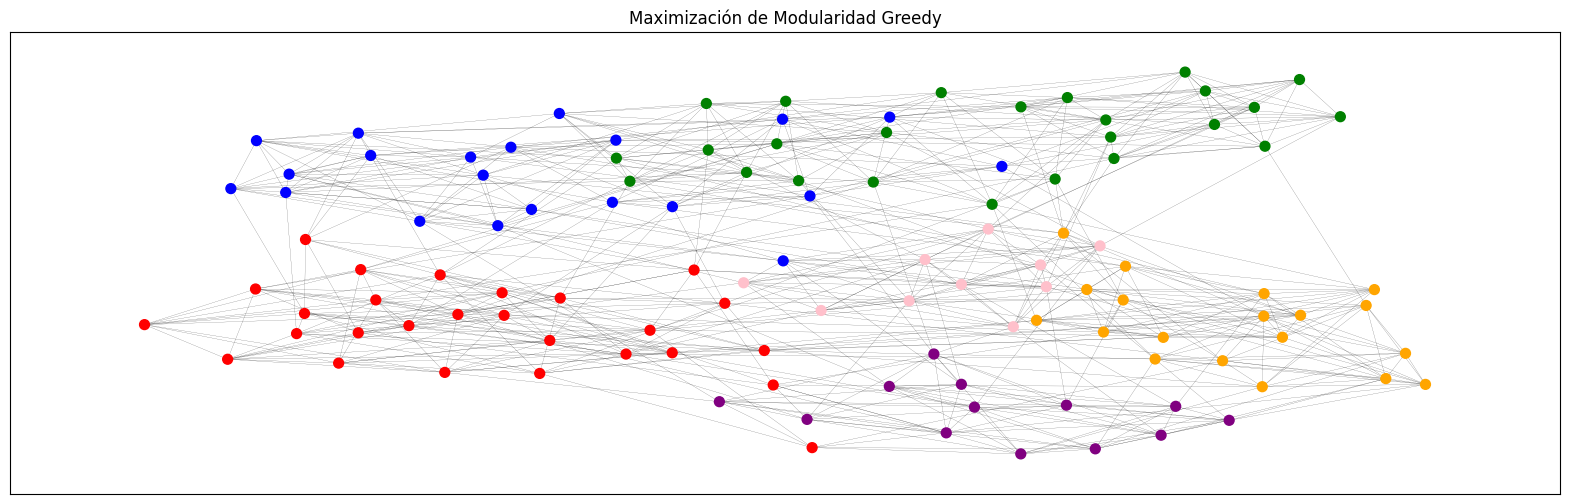

In [21]:
# max modularity greedy
c_mod = nx.algorithms.community.greedy_modularity_communities(H)

mod_colors = ["red" if i in c_mod[0] else "green" if i in c_mod[1] else "blue" if i in c_mod[2] else "orange" if i in c_mod[3] else "purple" if i in c_mod[4] else "pink" for i in H.nodes()]

plt.figure(figsize=(20,6))
nx.draw_networkx(H, pos, node_size = 50, width = 0.1, with_labels = False, node_color = mod_colors)
plt.title("Maximización de Modularidad Greedy");

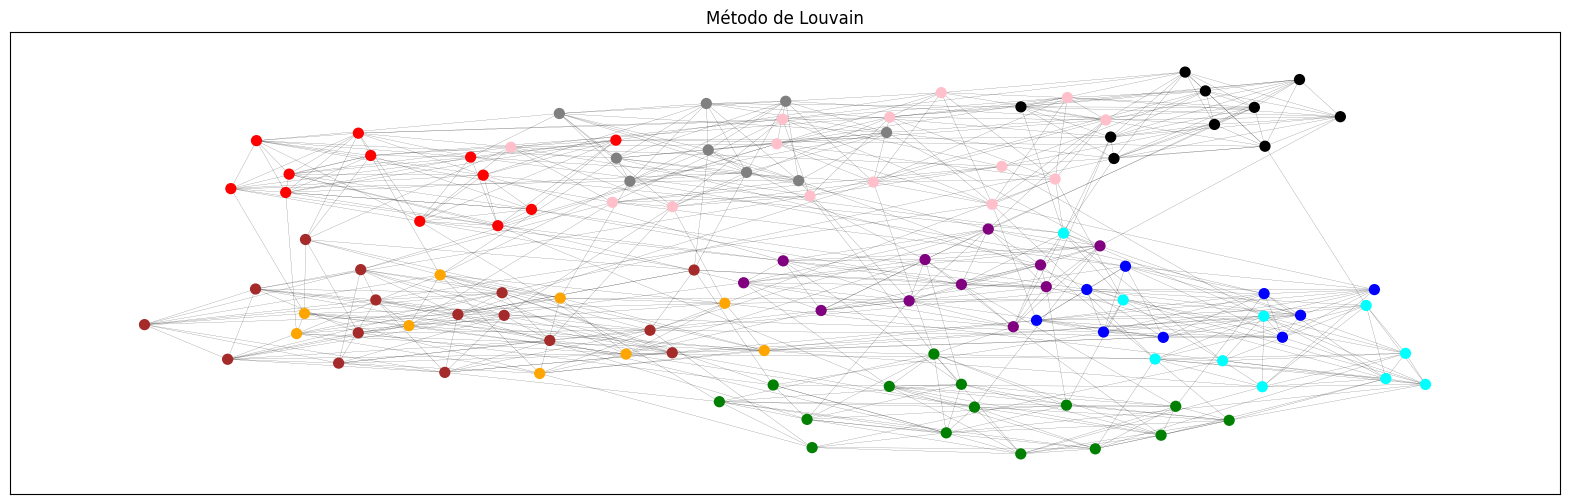

In [22]:
# Louvain
import random
random.seed(42)

c_louvain = nx.algorithms.community.louvain_communities(H)
lou_colors = ["red" if i in c_louvain[0] else "green" if i in c_louvain[1] else "blue" if i in c_louvain[2] else "orange" if i in c_louvain[3] else "purple" if i in c_louvain[4] else "pink" if i in c_louvain[5] else "gray" if i in c_louvain[6] else "cyan" if i in c_louvain[7] else "brown" if i in c_louvain[8] else "black" if i in c_louvain[9] else "navy" for i in H.nodes()]
plt.figure(figsize=(20,6))
nx.draw_networkx(H, pos, node_size = 50, width = 0.1, with_labels = False, node_color = lou_colors)
plt.title("Método de Louvain");

> Maximización de modularidad greedy genera 6 comunidades mientras que el método de Louvain genera 10.

## Distribucion de Conferencias Original

<img src="original-football.png" width="1000" height="400">

> En general el método de Louvaine terminó entregando resultados casi idénticos a la distribución de Conferencias Original.

# Bonus:

In [23]:
# Erdös-Rényi con n = 1708 y p = 0.01
G_erdos_renyi = nx.erdos_renyi_graph(n = 1708, p = 0.01)
# grafo aleatorio Watts-Strogatz con n = 1708, k = 20 y p = 0.2
G_watts_strogatz = nx.watts_strogatz_graph(n = 1708, k = 20, p = 0.2)
# grafo aleatorio Barabasi-Albert con n = 1708 y m = 3
G_barabasi_albert = nx.barabasi_albert_graph(n = 1708, m = 3)

In [24]:
# función histograma de grados
def hist_grad(G, figsize = (10,6)):
    degrees = [d for n, d in G.degree()]
    plt.figure(figsize=figsize)
    plt.hist(degrees, bins = 100)
    plt.title("Histograma de grados", fontsize = 10)
    plt.ylabel("Cantidad de nodos", fontsize=10)
    plt.xlabel("Grados")
    plt.show()
    
def prom_dist(G):
    dist = nx.average_shortest_path_length(G)
    msg = "El grafo tiene una distancia promedio de " + str(round(dist, 3))
    return msg

def coef_clust(G):
    clust = nx.average_clustering(G)
    msg = "El grafo tiene un coeficiente de clustering de " + str(round(clust, 4))
    return msg

### Grafo Actores

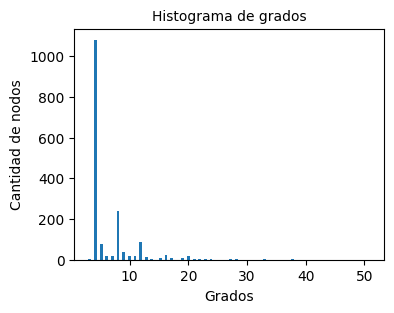

El grafo tiene una distancia promedio de 5.123
El grafo tiene un coeficiente de clustering de 0.8011


In [25]:
hist_grad(G, figsize = (4,3))
print(prom_dist(G))
print(coef_clust(G))

### Erdos-Renyi

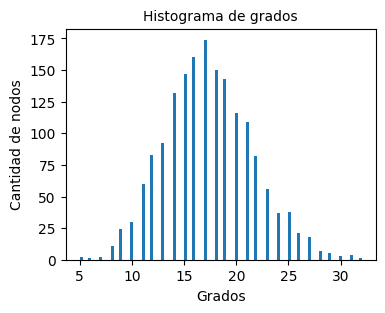

El grafo tiene una distancia promedio de 2.882
El grafo tiene un coeficiente de clustering de 0.0101


In [26]:
hist_grad(G_erdos_renyi, figsize = (4,3))
print(prom_dist(G_erdos_renyi))
print(coef_clust(G_erdos_renyi))

### Watts-Strogatz

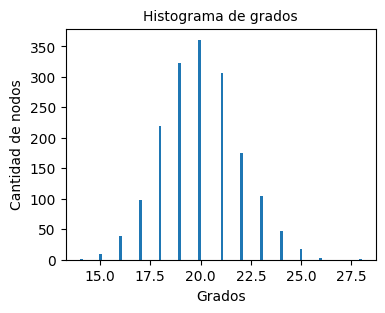

El grafo tiene una distancia promedio de 3.173
El grafo tiene un coeficiente de clustering de 0.3709


In [27]:
hist_grad(G_watts_strogatz, figsize = (4,3))
print(prom_dist(G_watts_strogatz))
print(coef_clust(G_watts_strogatz))


### Barabasi-Albert

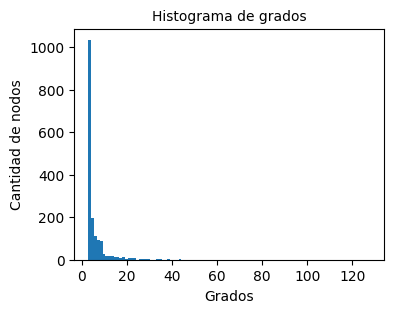

El grafo tiene una distancia promedio de 3.662
El grafo tiene un coeficiente de clustering de 0.0223


In [28]:
hist_grad(G_barabasi_albert, figsize = (4,3))
print(prom_dist(G_barabasi_albert))
print(coef_clust(G_barabasi_albert))

> Se puede ver que Erdos-Renyi y Watt-Strogatz generan distribuciones de Grados con una distribución muy similar a la Gaussiana. La principal diferencia entre ambos es que Watt-Strogatz entrega un coeficiente de Clustering mucho mayor. Es decir los vecinos de los vecinos de un Nodo en Watt-Strogatz se conocen mucho más que en el otro caso. 

> Barabasi-Albert y el Grafo de actores tiende a ser una distribución exponencial (similar a una red social real), en la que se puede ver que la mayoría de los nodos tiene un bajo grado de conexión y sólo existen un puñado de nodos con un alto grado. La principal diferencia, es que el Grafo de Actores tiene un altísimo coeficiente de Clustering, probablemente porque son todos los actores se conocen entre ellos.